In [ ]:
import nltk
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import numpy as np

# Read File

In [175]:
new_path = '/home/cloudera/cs.txt'
def read_file(str):
    file = open(str,'r')
    txt=file.read()
    #print(txt)
    return txt

In [176]:
txt=read_file(new_path)


In [177]:
type(txt)

str

# Split text to pragraphs 

In [178]:
def txt_pragraphs(str):
    pragraphs = str.split("\n\n")
    return pragraphs
pragraphs=txt_pragraphs(txt)
type(pragraphs)


list

In [180]:
n_pragraph=1
pragraphs[n_pragraph]


'\nComputer science is a discipline that spans theory and practice. It requires thinking both in abstract terms and in concrete terms. The practical side of computing can be seen everywhere. Nowadays, practically everyone is a computer user, and many people are even computer programmers.\nGetting computers to do what you want them to do requires intensive hands-on experience. But computer science can be seen on a higher level, as a science of problem solving. Computer scientists must be adept at modeling and analyzing problems. They must also be able to design solutions and verify that they are correct. Problem solving requires precision, creativity, and careful reasoning.'

# Split Pragraph to Sentences 

In [181]:
from nltk.tokenize import sent_tokenize, word_tokenize


In [182]:
#print(sent_tokenize(pragraphs(txt)[1]))
def pragraph_to_setnences(str):
    return sent_tokenize(str)
setnences=pragraph_to_setnences(pragraphs[n_pragraph])


## Word Process For Sentence

In [183]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

## Removing English stopwords and Punct per Sentence

In [184]:
new_stop_words = ['the', 'that', 'to', 'as', 'there', 'has', 'and', 'or', 'is', 'not', 'a', 'of', 'but', 'in', 'by', 'on', 'are', 'it', 'if','what','where','how','when']
new_stop_words2=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','even','until','then','must']

from stemming.porter2 import stem
from nltk import PorterStemmer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
#stemmer = PorterStemmer()
stemmer = SnowballStemmer("english", ignore_stopwords=True)
def remove_stopword_sentences(str):
    tokenizer = RegexpTokenizer("[\w']+")
    words=tokenizer.tokenize(str)
    english_stops = set(stopwords.words('english'))
    stems=[]
    list_word=[word for word in words if word.lower() not in english_stops and word.lower() not in new_stop_words and word.lower() not in new_stop_words2]
    for word in list_word:
        #stems.append(stem(word))
        #stems.append(PorterStemmer().stem(word))
        #stems.append(stemmer.stem(word))
        #stems.append(stemmer.stem("computer"))
        stems.append(word)
    
    return stems#(stem(setem_word for setem_word in  ([word for word in words if word not in english_stops and word not in new_stop_words])))

In [185]:
words=remove_stopword_sentences(setnences[n_pragraph])
count = Counter(words)
# to count words
#print (count.most_common(10))
print(words)
print(count)

['requires', 'thinking', 'abstract', 'terms', 'concrete', 'terms']
Counter({'terms': 2, 'requires': 1, 'abstract': 1, 'concrete': 1, 'thinking': 1})


# Compute Frequencies

In [186]:

def compute_freq(word_vec):
    headers=["Freq"]
    
    word_nonfreq={}
    
    for index in range(len(word_vec)):
        #word_nonfreq.append(word)
        
        for index2 in range(len(word_vec)):
            counter=0
            if index2+1 in range(len(word_vec)):
                print (word_vec[index],word_vec[index2+1])
                if word_vec[index]==word_vec[index2+1]:
                    counter+=1
        word_nonfreq[ word_vec[index]]=counter
        #print(counter)
        #df_frequencies.loc[word]=counter
    df_frequencies = pd.DataFrame(word_nonfreq,index=headers, columns=word_nonfreq ) 
    
    
    return df_frequencies


def count_freq(word_vec):
    headers=["Freq"]
    count = Counter(word_vec)
    df_frequencies = pd.DataFrame(count,index=headers, columns=count ) 
    #print(count)
    
    return df_frequencies
            
#ss=compute_freq(words)
xx=count_freq(words)
xx
#list(xx)
#ss

,requires,abstract,concrete,thinking,terms
Freq,1,1,1,1,2


## Word Sense Disambiguation (WSD): LESK per Sentence
Given an ambiguous word and the context in which the word occurs, Lesk returns a Synset with the highest number of overlapping words between the context sentence and different definitions from each Synset.



In [187]:
from nltk.wsd import lesk
'''
this function for compute lesk for each word(list of word) in sentence
'''
def lesk_words_sentence(words,sentence):
    lesks= []
    for word in words:
        if lesk(sentence,word, 'n') is not None:
            lesks.append(lesk(sentence,word, 'n'))
            #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesks
    

In [188]:
'''
this function for compute lesk of word in sentence
'''

def lesk_word_sentence(word,sentence):
    #lesks= []
    #for word in words:
    lesk_synset=lesk(sentence,word, 'n')
        #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesk_synset

In [189]:
lesks=lesk_words_sentence(words,setnences[0])
leskss=lesk_word_sentence(words[1],setnences[0])
#print(words[1],setnences[0])
#print (leskss)

In [190]:
#type(lesks)

## Calculating WordNet Synset similarity using information content

In [191]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize

'''
this function for compute similarty between 2 synset 
'''

def similarity_by_infocontent(sense1, sense2, option):
    """ Returns similarity scores by information content. """
    #if sense1.pos != sense2.pos: # infocontent sim can't do diff POS.
        #return 0

    info_contents = ['ic-bnc-add1.dat', 'ic-bnc-resnik-add1.dat', 
                     'ic-bnc-resnik.dat', 'ic-bnc.dat', 

                     'ic-brown-add1.dat', 'ic-brown-resnik-add1.dat', 
                     'ic-brown-resnik.dat', 'ic-brown.dat', 

                     'ic-semcor-add1.dat', 'ic-semcor.dat',

                     'ic-semcorraw-add1.dat', 'ic-semcorraw-resnik-add1.dat', 
                     'ic-semcorraw-resnik.dat', 'ic-semcorraw.dat', 

                     'ic-shaks-add1.dat', 'ic-shaks-resnik.dat', 
                     'ic-shaks-resnink-add1.dat', 'ic-shaks.dat', 

                     'ic-treebank-add1.dat', 'ic-treebank-resnik-add1.dat', 
                     'ic-treebank-resnik.dat', 'ic-treebank.dat']

    if option in ['res', 'resnik']:
        #return wn.res_similarity(sense1, sense2, wnic.ic('ic-bnc-resnik-add1.dat'))
        #print('simRe snik (c1,c2) = -log p(lso(c1,c2)) = IC(lso(c1,c2)')
        return wn.res_similarity(sense1, sense2, wnic.ic('ic-treebank-resnik-add1.dat'))
    #return min(wn.res_similarity(sense1, sense2, wnic.ic(ic)) \
    #             for ic in info_contents)

    elif option in ['jcn', "jiang-conrath"]:
        #return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(jcn) (c1,c2 )= (IC(c1) + IC(c2 )) - 2IC(lso(c1,c2 ))')
        return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

    elif option in ['lin']:
        #return wn.lin_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(lin) (c1,c2)=(2IC(lso(c1,c2 )))/(IC(c1)+IC(c2))')
        return wn.lin_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

def sim(sense1, sense2, option="path"):
    """ Calculates similarity based on user's choice. """
    option = option.lower()
    if option.lower() in ["path", "path_similarity", 
                        "wup", "wupa", "wu-palmer", "wu-palmer",
                        'lch', "leacock-chordorow"]:
        return similarity_by_path(sense1, sense2, option) 
    elif option.lower() in ["res", "resnik",
                          "jcn","jiang-conrath",
                          "lin"]:
        return similarity_by_infocontent(sense1, sense2, option)

def max_similarity(context_sentence, ambiguous_word, option="path", 
                   pos=None, best=True):
    """
    Perform WSD by maximizing the sum of maximum similarity between possible 
    synsets of all words in the context sentence and the possible synsets of the 
    ambiguous words (see http://goo.gl/XMq2BI):
    {argmax}_{synset(a)}(\sum_{i}^{n}{{max}_{synset(i)}(sim(i,a))}
    """
    result = {}
    for i in wn.synsets(ambiguous_word):
        try:
            if pos and pos != str(i.pos()):
                continue
        except:
            if pos and pos != str(i.pos):
                continue
        result[i] = sum(max([sim(i,k,option) for k in wn.synsets(j)]+[0]) \
                        for j in word_tokenize(context_sentence))

    if option in ["res","resnik"]: # lower score = more similar
        result = sorted([(v,k) for k,v in result.items()])
    else: # higher score = more similar
        result = sorted([(v,k) for k,v in result.items()],reverse=True)
    #print (result)
    if best: return result[0][1];
    return result

In [192]:
print(lesks[2],lesks[1])
similarity_by_infocontent(lesks[2],lesks[1],'res')

Synset('terminus.n.03') Synset('outline.n.02')


0.622354726626253

In [193]:
#wn.res_similarity(lesks[1],lesks[2], wnic.ic('ic-bnc-resnik-add1.dat'))

In [194]:
#similarity_by_infocontent(lesks[2],lesks[1],'jcn')

In [195]:
#similarity_by_infocontent(lesks[2],lesks[1],'lin')

## Simlarty per Words for Sentence

In [196]:
#df_sentence_similarty = pd.DataFrame(index=words, columns=words )
#df_sentence_similarty.loc[words[0]]=[1,2,3,4,5,6]
'''
to retrive similarty between list of synset
'''
rows_list = []
def simlarty_perWords(list_words,option):
    for index in range(len(list_words)):
        if index+1 <len(list_words):
            #df_similarty.loc[list_words[index]]
            #print(list_words[index].lowest_common_hypernyms(list_words[index+1]))
            #print(list_words[index],list_words[index+1],similarity_by_infocontent(list_words[index],list_words[index+1],option))
            rows_list.append(similarity_by_infocontent(list_words[index],list_words[index+1],option))
    return rows_list
            

In [197]:
simlarty_perWords(lesks,'res')

[0.622354726626253, 0.622354726626253, 2.561044990474273, 2.561044990474273]

In [198]:
#simlarty_perWords(lesks,'lin')

In [199]:
#simlarty_perWords(lesks,'jcn')

# TF-IDF
TF-IDF stands for "Term Frequency, Inverse Document Frequency". It is a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.

Intuitively...
If a word appears frequently in a document, it's important. Give the word a high score.
But if a word appears in many documents, it's not a unique identifier. Give the word a low score.

In [200]:
import tfidf
#https://github.com/hrs/python-tf-idf
table = tfidf.tfidf()
table.addDocument("foo", [lesks[0],lesks[1],lesks[3]])
#table.addDocument("bar", ["alpha", "bravo", "charlie", "india", "juliet", "kilo"])
#table.addDocument("baz", ["kilo", "lima", "mike", "november"])

#print (table.similarities ([lesks[0],lesks[1],lesks[3]]))

In [201]:
import pandas as pd
from pandas import Series, DataFrame


In [202]:
#df

# Pragraph Words Similarty

In [203]:
'''
calculate IC(p(C1)) per feature and 
'''
'''
get lesk of vector per pragraph
'''

def pragraph_lesks(pragraph,option):
    lesk_vec=[]# synset lesk of words per pragraph
    #synset_lesk_noDuplicates=[]
    Sentences=pragraph_to_setnences(pragraph)
    for sentence in Sentences:
        Words=remove_stopword_sentences(sentence)
        for word in Words:
            lesk_synset=lesk_word_sentence(word,sentence)
            if lesk_synset is not None:
                lesk_vec.append(lesk_synset)

    return lesk_vec

    

In [213]:
lesk_vec=pragraph_lesks(pragraphs[n_pragraph],'res')

In [214]:
'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies
'''
def Dimensionality_reduction(lesk_vec):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    #print(type(avg))
    #lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T).T
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':]/avg >1].T).T
    return lesk_vec_after_freq
    #total=df_freq.values.sum().sum()

In [215]:
lesk_vec_after_Dimensionality_reduction=Dimensionality_reduction(lesk_vec)
lesk_vec_after_Dimensionality_reduction

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Freq,3.0,2.0,2.0,3.0,6.0


In [216]:

'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies and ratio
'''

def Dimensionality_reduction_with_ratio(lesk_vec):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':]/avg > 1].T)
   
    total=lesk_vec_after_freq.values.sum().sum()
    #print(lesk_vec_after_freq.T)
    lesk_vec_after_freq['Ratio']=(lesk_vec_after_freq['Freq']/total)
    
    return lesk_vec_after_freq.T

In [217]:
rmv_red_ratio=Dimensionality_reduction_with_ratio(lesk_vec)
rmv_red_ratio


,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Freq,3.0000,2.000,2.000,3.0000,6.000
Ratio,0.1875,0.125,0.125,0.1875,0.375


In [218]:
'''
calculate simantic simelart for Dimensionality reduction vector
say vector is n element [n1,n2,n3,.....nm], data frame row=n,col=n
sim(n[row],n[col])if if row != col:
option is sim method like res,lin,jcn ...... for IC

'''


def sim_pragraph_lesk(df_freq,option):
    
    series=list(df_freq)#pd.Series(data=lesk_vec)
    #series.drop_duplicates()
    synset_lesk_noDuplicates= series#.tolist()    
    df_all_synset_lesk = pd.DataFrame(index=series, columns=series )            
    #print ("synset_lesk_noDuplicates",len(synset_lesk_noDuplicates))
    
    for row in range(len(synset_lesk_noDuplicates)):
        try:
            data_row=[]
            for col in range(len(synset_lesk_noDuplicates)):

                    if row < col:

                        sim=similarity_by_infocontent(series[row],series[col],option)
                        if sim is not None:
                            data_row.append(sim)
                        else:
                            data_row.append(0)
                        #print(len(data_row))


                    else:

                        data_row.append(0)
                        #print(len(data_row))

            #print(series[row])
            df_all_synset_lesk.loc[series[row]]=data_row
        except  Exception as inst:
                data_row.append(0)
                print(type(inst))    # the exception instance
                print(inst.args)     # arguments stored in .args
                print(inst)          # __str__ allows args to be printed directly,
                pass
                #print("Ex")
    return df_all_synset_lesk



In [219]:
sim_lesk_vec_after_Dimensionality_reduction=sim_pragraph_lesk(lesk_vec_after_Dimensionality_reduction,'res')
sim_lesk_vec_after_Dimensionality_reduction

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,1.78127,0.622355,3.08626,-0
Synset('resolution.n.04'),0,0,0.622355,1.78127,-0
Synset('terminus.n.03'),0,0,0,0.622355,2.56104
Synset('science.n.01'),0,0,0,0,-0
Synset('computer.n.01'),0,0,0,0,0


In [220]:
'''
calculate similartyin_pragraph

'''

def similarty_pragraph(pragraph,option):
    lesk_vec=pragraph_lesks(pragraph,option)
    lesk_vec_after_Dimensionality_reduction=Dimensionality_reduction(lesk_vec)
    sim_lesk_vec_after_Dimensionality_reduction=sim_pragraph_lesk(lesk_vec_after_Dimensionality_reduction,option)
    return sim_lesk_vec_after_Dimensionality_reduction
    

In [221]:
res_df=similarty_pragraph(pragraphs[n_pragraph],'res')
res_df
#res_df.to_csv('res_df.csv')



,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,1.78127,0.622355,3.08626,-0
Synset('resolution.n.04'),0,0,0.622355,1.78127,-0
Synset('terminus.n.03'),0,0,0,0.622355,2.56104
Synset('science.n.01'),0,0,0,0,-0
Synset('computer.n.01'),0,0,0,0,0


In [222]:
jcn_df=similarty_pragraph(pragraphs[n_pragraph],'jcn')
jcn_df

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,0.0673022,0.067755,0.111446,0.066154
Synset('resolution.n.04'),0,0,0.0578914,0.070757,0.0567186
Synset('terminus.n.03'),0,0,0,0.0712577,0.0940726
Synset('science.n.01'),0,0,0,0,0.069489
Synset('computer.n.01'),0,0,0,0,0


In [223]:
lin_df=similarty_pragraph(pragraphs[n_pragraph],'lin')
lin_df

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,0.175876,0.0638035,0.393272,-0
Synset('resolution.n.04'),0,0,0.0550262,0.18325,-0
Synset('terminus.n.03'),0,0,0,0.0668813,0.308232
Synset('science.n.01'),0,0,0,0,-0
Synset('computer.n.01'),0,0,0,0,0


# Classfication per pragraph

In [224]:
'''
to calculate mean per colum and ratio of this mean for any matrix 
'''

def add_mean_ratio(df):
    inverse_df=df.T

    #inverse_df['Mean']=inverse_df.apply(np.mean)
    inverse_df['Mean']=inverse_df.mean(axis=1)
    total=inverse_df.values.sum()

    #ss['Max']=ss.apply(np.max)
    #ss['MIN']=ss.apply(np.min)
    #ss['Total']=ss.apply(np.sum) #[col,row] #.apply(np.mean)
    #ss.groupby("Mean").sum()
    total_mean=inverse_df['Mean'].sum()

    inverse_df['Ratio_mean']=inverse_df['Mean']/total_mean#ss.apply(np.mean)
    #ss['RATIO']=ss.apply(ss['Mean']/ss['Total'])
    return inverse_df.T
    

In [225]:

#inverse_df=res_df.T
#inverse_df['Mean']=inverse_df.mean(axis=1)
#inverse_df.T

mres_df=add_mean_ratio(res_df)
mres_df

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,1.78127,0.622355,3.08626,-0
Synset('resolution.n.04'),0,0,0.622355,1.78127,-0
Synset('terminus.n.03'),0,0,0,0.622355,2.56104
Synset('science.n.01'),0,0,0,0,-0
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.356254,0.248942,1.09798,0.512209
Ratio_mean,0,0.160809,0.11237,0.495615,0.231206


In [226]:
'''
multible each pragraph element in ratio of frequancy
'''
def pragraph_ratio_mean(res_df,rmv_red_ratio):
    pragraph_ratio_values=res_df.values*rmv_red_ratio.T['Ratio'].T.values
    pragraph_ratio_df= pd.DataFrame(pragraph_ratio_values,index=res_df.index, columns=res_df.columns)
    pragraph_ratio_df_mean=add_mean_ratio(pragraph_ratio_df)
    return pragraph_ratio_df_mean



In [227]:
'''
multible each pragraph element in freq of frequancy
'''
def pragraph_freq_mean(res_df,rmv_red_ratio):
    pragraph_freq_values=res_df.values*rmv_red_ratio.T['Freq'].T.values
    pragraph_freq_df= pd.DataFrame(pragraph_freq_values,index=res_df.index, columns=res_df.columns)
    pragraph_freq_df_mean=add_mean_ratio(pragraph_freq_df)
    return pragraph_freq_df_mean

In [228]:
pragraph_ratio_mean_res=pragraph_ratio_mean(res_df,rmv_red_ratio)
pragraph_ratio_mean_res


,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,0.222659,0.0777943,0.578674,-0
Synset('resolution.n.04'),0,0,0.0777943,0.333988,-0
Synset('terminus.n.03'),0,0,0,0.116692,0.960392
Synset('science.n.01'),0,0,0,0,-0
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.0445317,0.0311177,0.205871,0.192078
Ratio_mean,0,0.0940285,0.0657049,0.434695,0.405572


In [229]:
pragraph_freq_mean_res=pragraph_freq_mean(res_df,rmv_red_ratio)
pragraph_freq_mean_res

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,3.56254,1.24471,9.25878,-0
Synset('resolution.n.04'),0,0,1.24471,5.34381,-0
Synset('terminus.n.03'),0,0,0,1.86706,15.3663
Synset('science.n.01'),0,0,0,0,-0
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.712508,0.497884,3.29393,3.07325
Ratio_mean,0,0.0940285,0.0657049,0.434695,0.405572


In [230]:
pragraph_ratio_mean_jcn=pragraph_ratio_mean(jcn_df,rmv_red_ratio)
pragraph_ratio_mean_jcn

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,0.00841277,0.00846938,0.0208961,0.0248077
Synset('resolution.n.04'),0,0,0.00723643,0.0132669,0.0212695
Synset('terminus.n.03'),0,0,0,0.0133608,0.0352772
Synset('science.n.01'),0,0,0,0,0.0260584
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.00168255,0.00314116,0.00950476,0.0214826
Ratio_mean,0,0.0469842,0.0877149,0.265414,0.599887


In [231]:
pragraph_freq_mean_jcn=pragraph_freq_mean(jcn_df,rmv_red_ratio)
pragraph_freq_mean_jcn

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,0.134604,0.13551,0.334337,0.396924
Synset('resolution.n.04'),0,0,0.115783,0.212271,0.340311
Synset('terminus.n.03'),0,0,0,0.213773,0.564436
Synset('science.n.01'),0,0,0,0,0.416934
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.0269209,0.0502586,0.152076,0.343721
Ratio_mean,0,0.0469842,0.0877149,0.265414,0.599887


In [232]:
'''
to calculate (IC(c1) + IC(c2 )) by res and jcn
'''

def p_IC_C(res_df,jcn_df):
    ic=2*(res_df.values)
    pic= pd.DataFrame(jcn_df.values+ic,index=res_df.index, columns=res_df.columns)
    
    return pic

In [233]:
p_IC_C_df=p_IC_C(res_df,jcn_df)
p_IC_C_df

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,3.62984,1.31246,6.28397,0.066154
Synset('resolution.n.04'),0,0,1.3026,3.6333,0.0567186
Synset('terminus.n.03'),0,0,0,1.31597,5.21616
Synset('science.n.01'),0,0,0,0,0.069489
Synset('computer.n.01'),0,0,0,0,0


In [234]:
pragraph_ratio_mean_pic=pragraph_ratio_mean(p_IC_C_df,rmv_red_ratio)
pragraph_ratio_mean_pic

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,0.45373,0.164058,1.17824,0.0248077
Synset('resolution.n.04'),0,0,0.162825,0.681243,0.0212695
Synset('terminus.n.03'),0,0,0,0.246744,1.95606
Synset('science.n.01'),0,0,0,0,0.0260584
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.090746,0.0653766,0.421246,0.405639
Ratio_mean,0,0.0923146,0.0665067,0.428528,0.412651


In [235]:
pragraph_freq_mean_pic=pragraph_freq_mean(p_IC_C_df,rmv_red_ratio)
pragraph_freq_mean_pic

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,7.25968,2.62493,18.8519,0.396924
Synset('resolution.n.04'),0,0,2.6052,10.8999,0.340311
Synset('terminus.n.03'),0,0,0,3.9479,31.297
Synset('science.n.01'),0,0,0,0,0.416934
Synset('computer.n.01'),0,0,0,0,0
Mean,0,1.45194,1.04603,6.73994,6.49023
Ratio_mean,0,0.0923146,0.0665067,0.428528,0.412651


In [236]:
mjcn_df=add_mean_ratio(jcn_df)
mjcn_df

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,0.0673022,0.067755,0.111446,0.066154
Synset('resolution.n.04'),0,0,0.0578914,0.070757,0.0567186
Synset('terminus.n.03'),0,0,0,0.0712577,0.0940726
Synset('science.n.01'),0,0,0,0,0.069489
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.0134604,0.0251293,0.0506921,0.0572868
Ratio_mean,0,0.0918371,0.171451,0.345859,0.390853


In [237]:
picc=add_mean_ratio(p_IC_C_df)
picc

,Synset('trouble.n.01'),Synset('resolution.n.04'),Synset('terminus.n.03'),Synset('science.n.01'),Synset('computer.n.01')
Synset('trouble.n.01'),0,3.62984,1.31246,6.28397,0.066154
Synset('resolution.n.04'),0,0,1.3026,3.6333,0.0567186
Synset('terminus.n.03'),0,0,0,1.31597,5.21616
Synset('science.n.01'),0,0,0,0,0.069489
Synset('computer.n.01'),0,0,0,0,0
Mean,0,0.725968,0.523013,2.24665,1.0817
Ratio_mean,0,0.158601,0.114262,0.49082,0.236318


In [243]:
import numpy as np
lesk_vec=[]# synset lesk of words per pragraph
synset_lesk_noDuplicates=[]
Sentences=pragraph_to_setnences(pragraphs[1])
for sentence in Sentences:
    Words=remove_stopword_sentences(sentence)
    for word in Words:
        lesk_synset=lesk_word_sentence(word,sentence)
        if lesk_synset is not None:
            lesk_vec.append(lesk_synset)

#Count Freq
df_freq=count_freq(lesk_vec)
df_freq
#print(df_freq.values.sum())
#print(df_freq.T)

ss=DataFrame.dropna(df_freq[df_freq.ix['Freq':] > 1].T)
#total=ss.values.sum().sum()
#ss['Ratio']=(ss['Freq']/total)
#ss.T
ss.apply(np.mean)
#ss.ix[0,1 ] #[col,row] #.apply(np.mean)

Freq    3.2
dtype: float64

# Data Visualization

## Pragraph Bar Chart

In [244]:
'''
return bar chart of pragraph 
'''

import seaborn as sns
def pragraph_bar_ratio_mean_sns(pragraph_df):
    df=pragraph_df.T[['Ratio_mean']].T
    return sns.factorplot(data=df, kind='bar')
   


In [245]:
#pragraph_bar_ratio_mean_sns(mjcn_df)

In [246]:
import matplotlib.pyplot as plt
'''
bar per column in dataframe
'''
def pragraph_bar_ratio_mean(pragraph_df):
    df=pragraph_df.T[['Ratio_mean']]
    ax = df.plot(kind='bar', title ="Key Word Ratio", figsize=(10, 10), legend=True, fontsize=12)
    ax.set_xlabel("Key Words", fontsize=12)
    ax.set_ylabel("Ratio_mean", fontsize=12)
    plt.show()
    fig = ax.get_figure()
    fig.savefig("total-sales.png")

In [247]:
#pragraph_bar_ratio_mean(mjcn_df)

## Pragraph Pie

In [248]:
'''
return pie of pragraph
'''

import matplotlib.pyplot as plt
def pragraph_pie_ratio_mean(pragraph_df):
    #plt.pie(mjcn_df.T[['Ratio_mean']])
    #mjcn_df.T[['Ratio_mean']].plot(kind='pie',subplots=True)
    fig = plt.figure(figsize=(6,6), dpi=200)
    ax = plt.subplot(111)
    fig2 = ax.get_figure()
    fig.savefig("pie.png")
    return pragraph_df.T[['Ratio_mean']].plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, subplots=True)
    #mjcn_df.T[['Ratio_mean']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd75c2e8>], dtype=object)

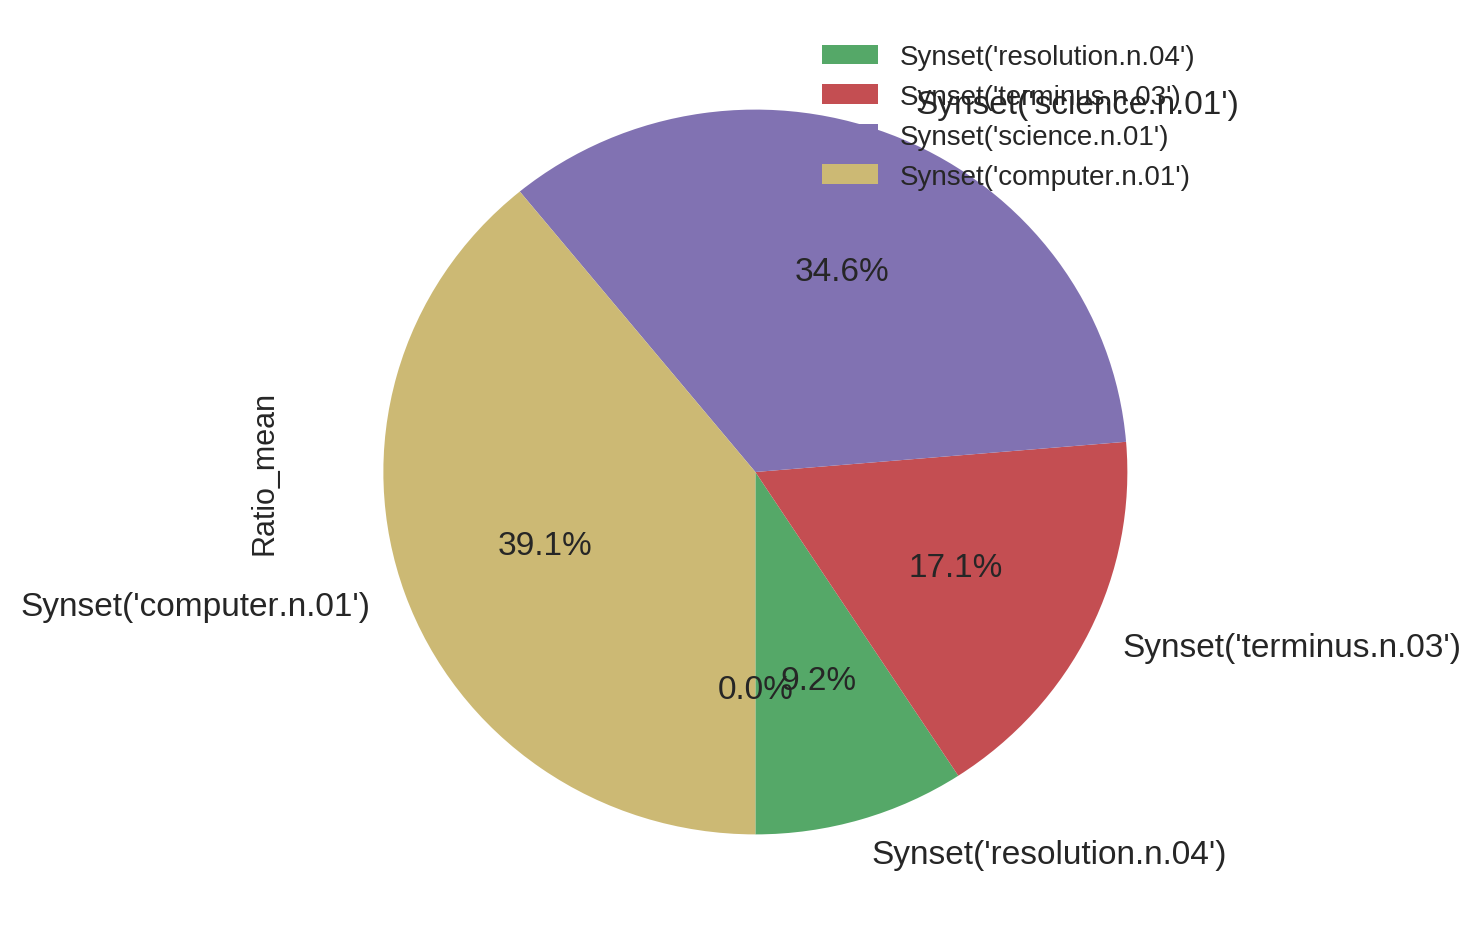

In [249]:
pragraph_pie_ratio_mean(mjcn_df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cea70e10>], dtype=object)

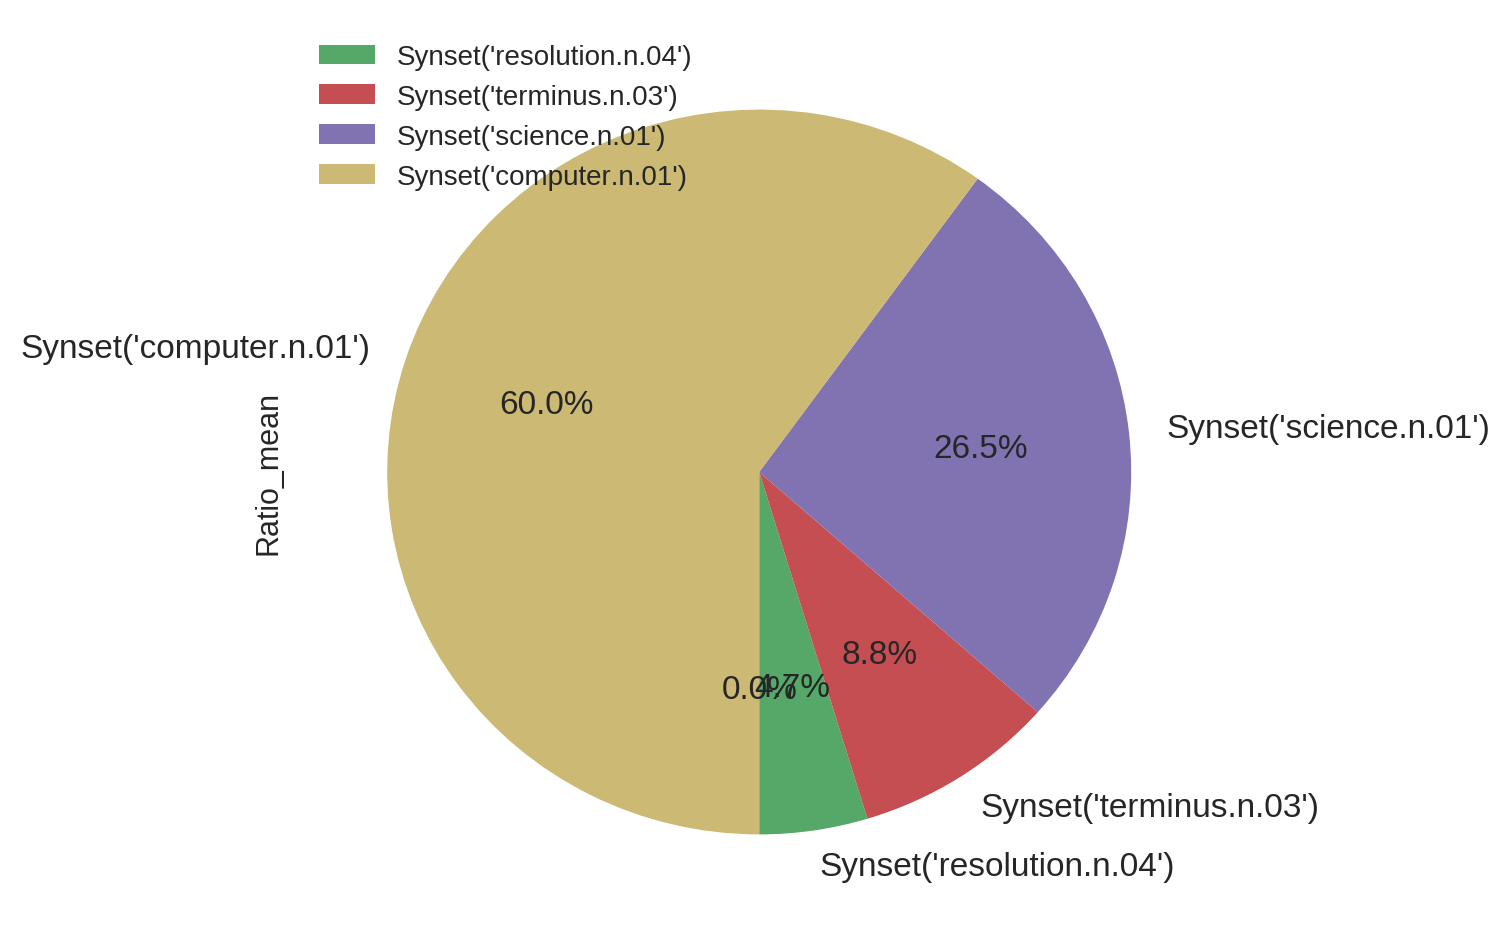

In [250]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_jcn)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd95a3c8>], dtype=object)

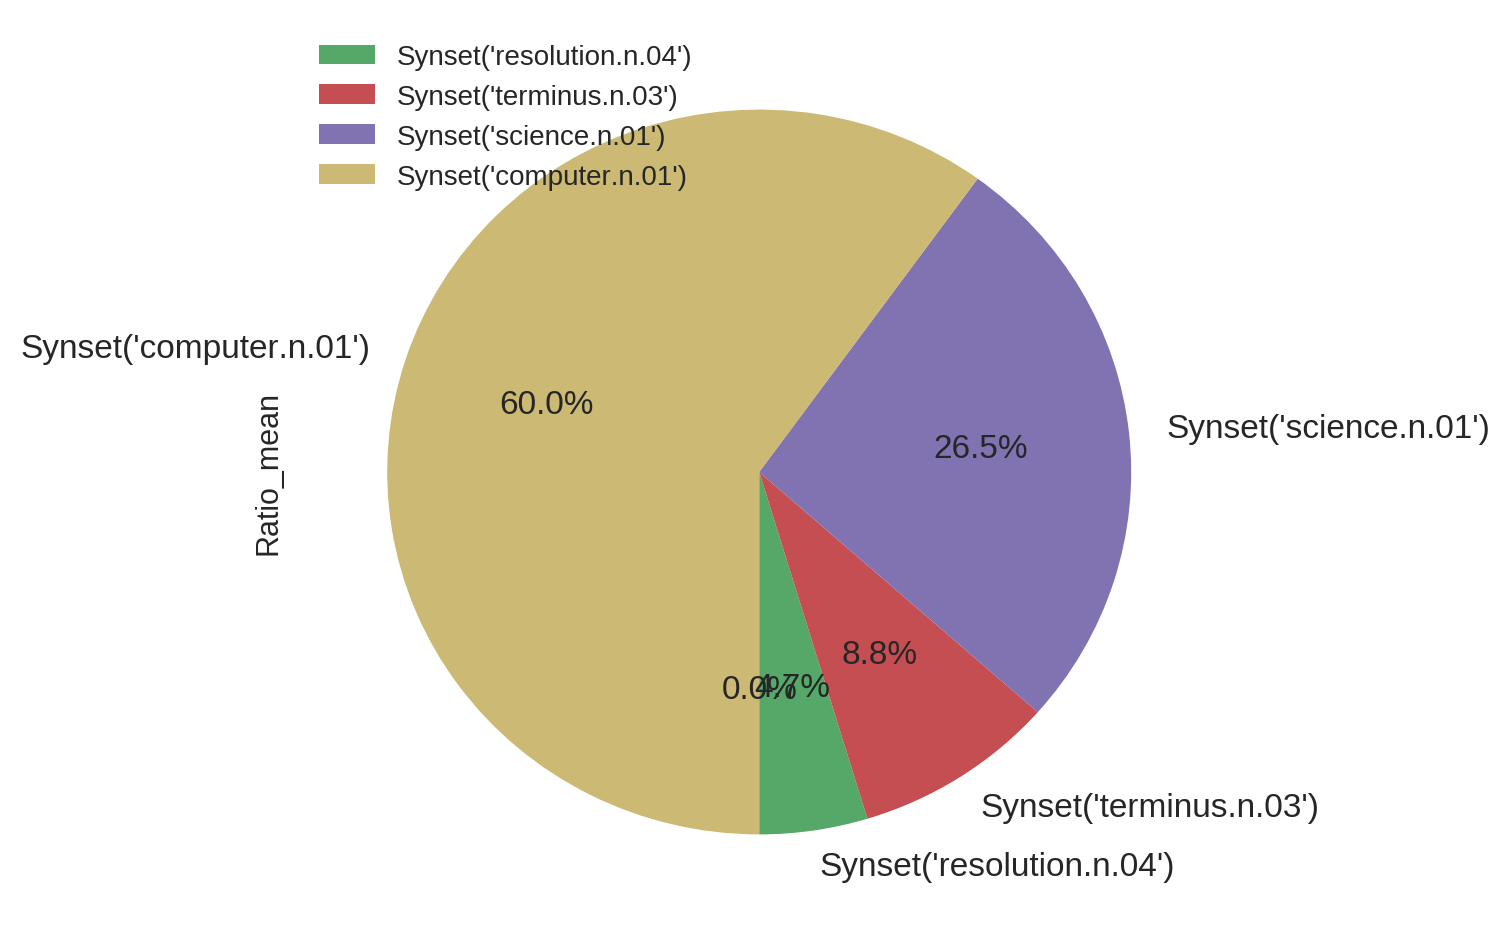

In [251]:
pragraph_pie_ratio_mean(pragraph_freq_mean_jcn)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd83ceb8>], dtype=object)

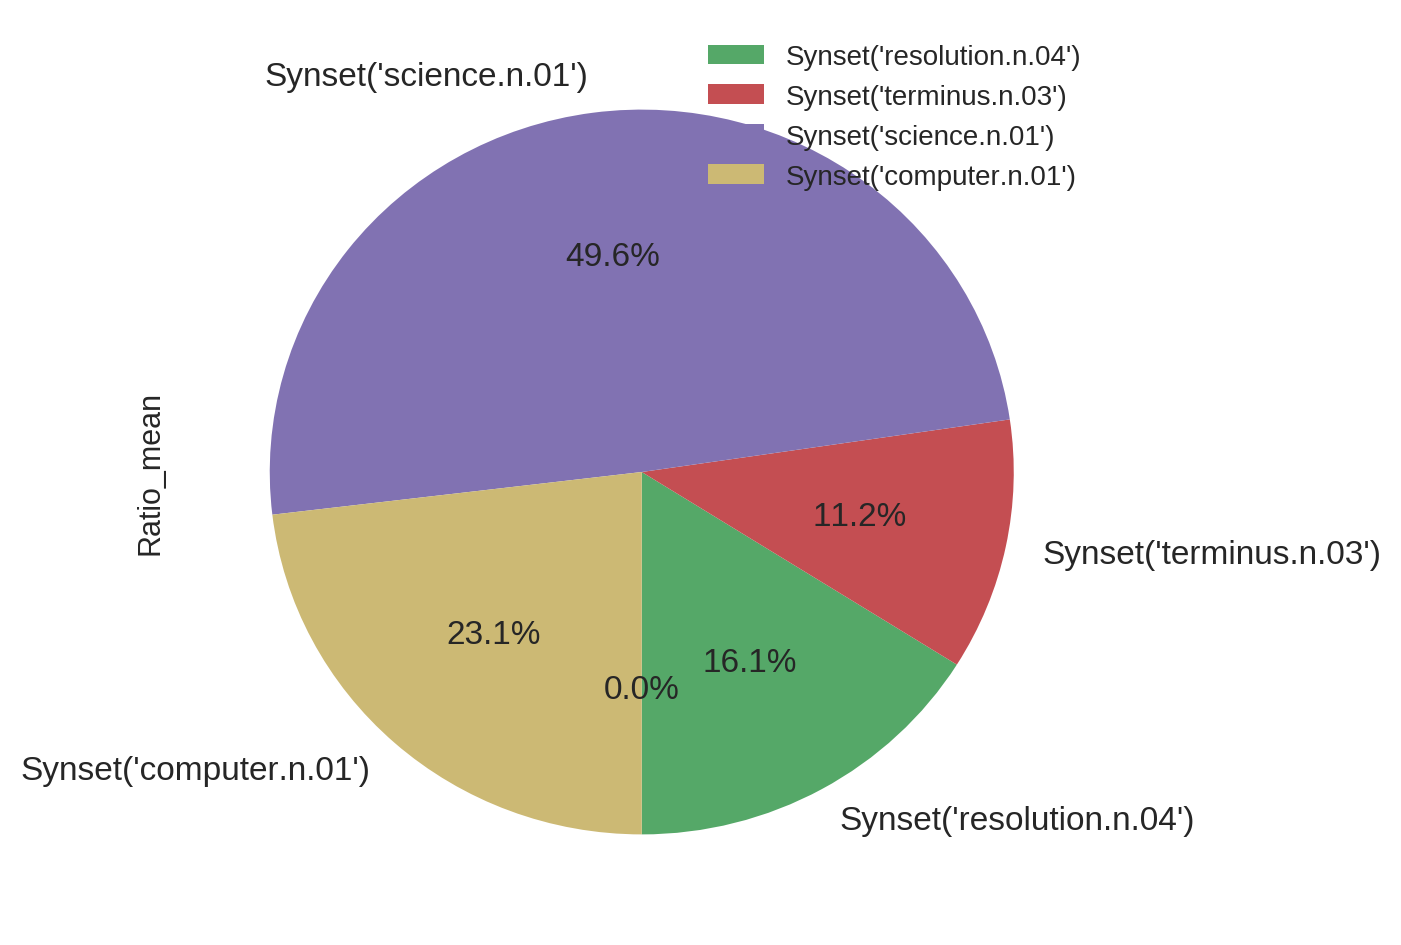

In [252]:
pragraph_pie_ratio_mean(mres_df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd840cc0>], dtype=object)

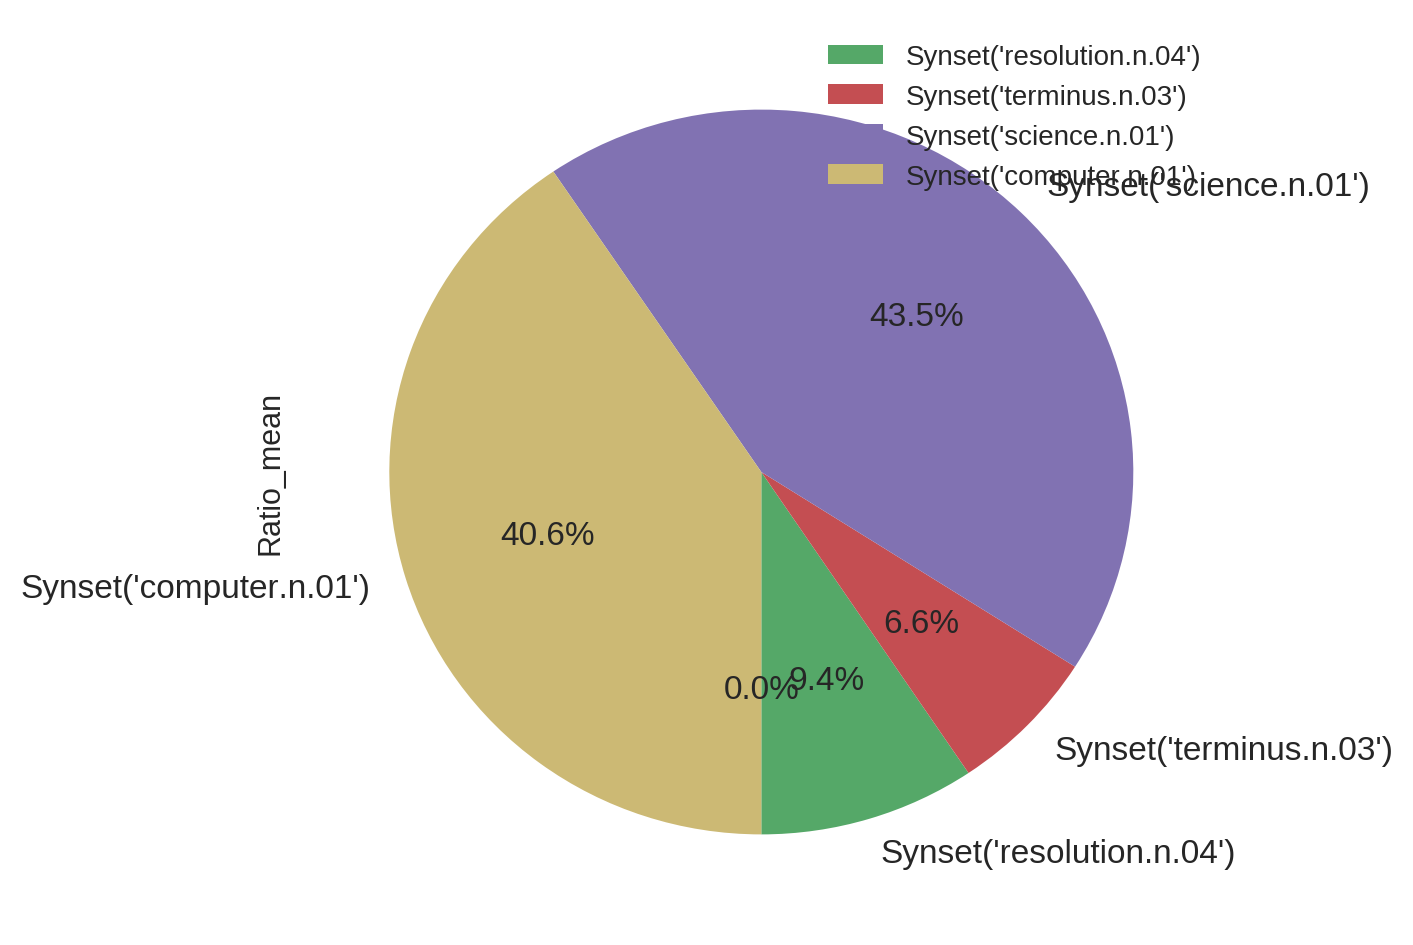

In [253]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_res)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd746278>], dtype=object)

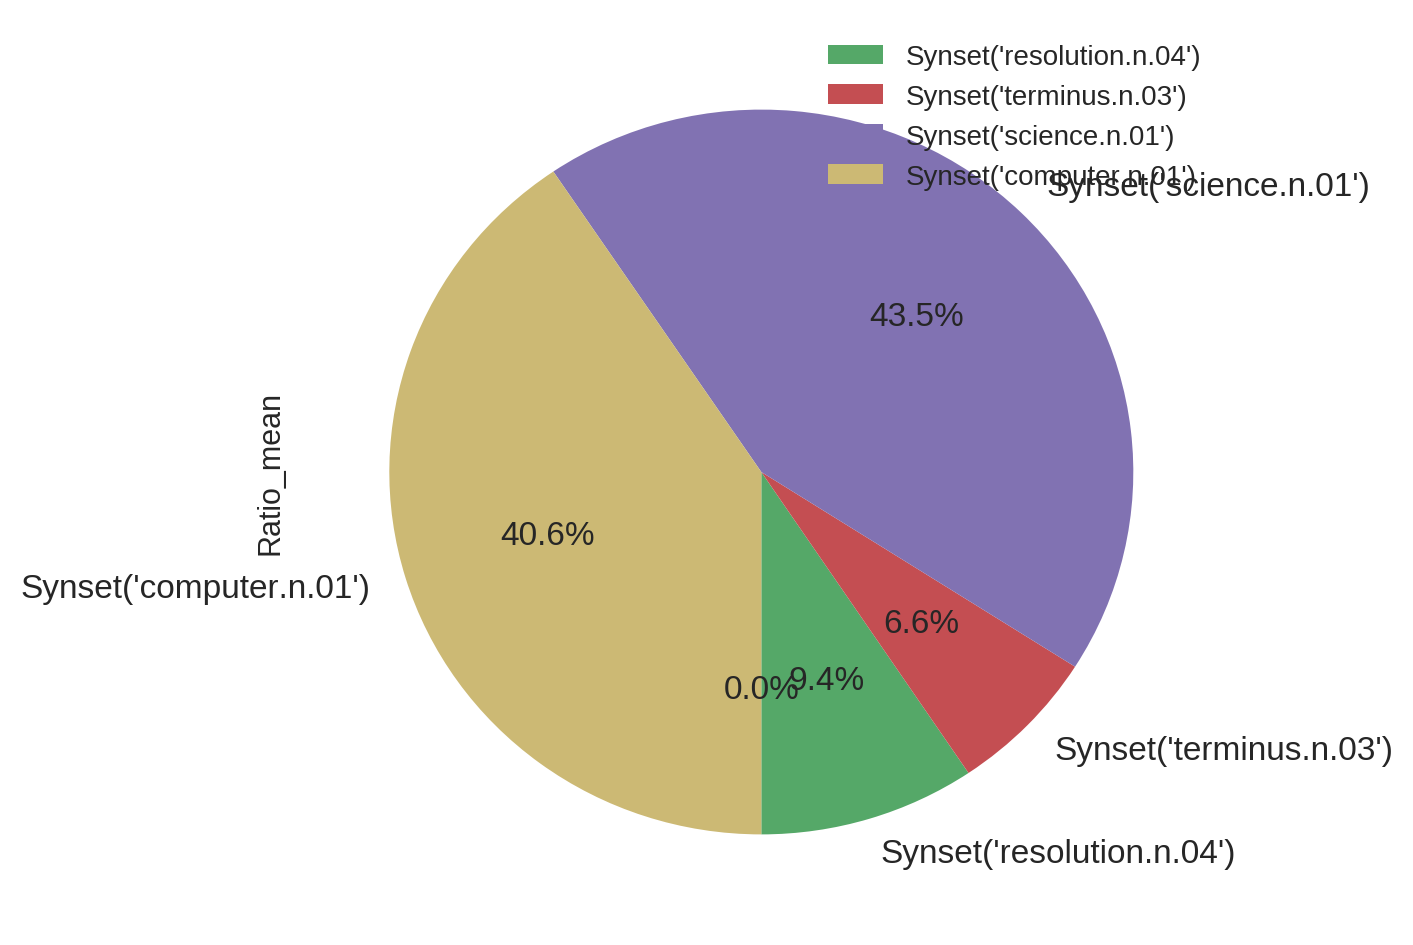

In [254]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_res)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd96a5f8>], dtype=object)

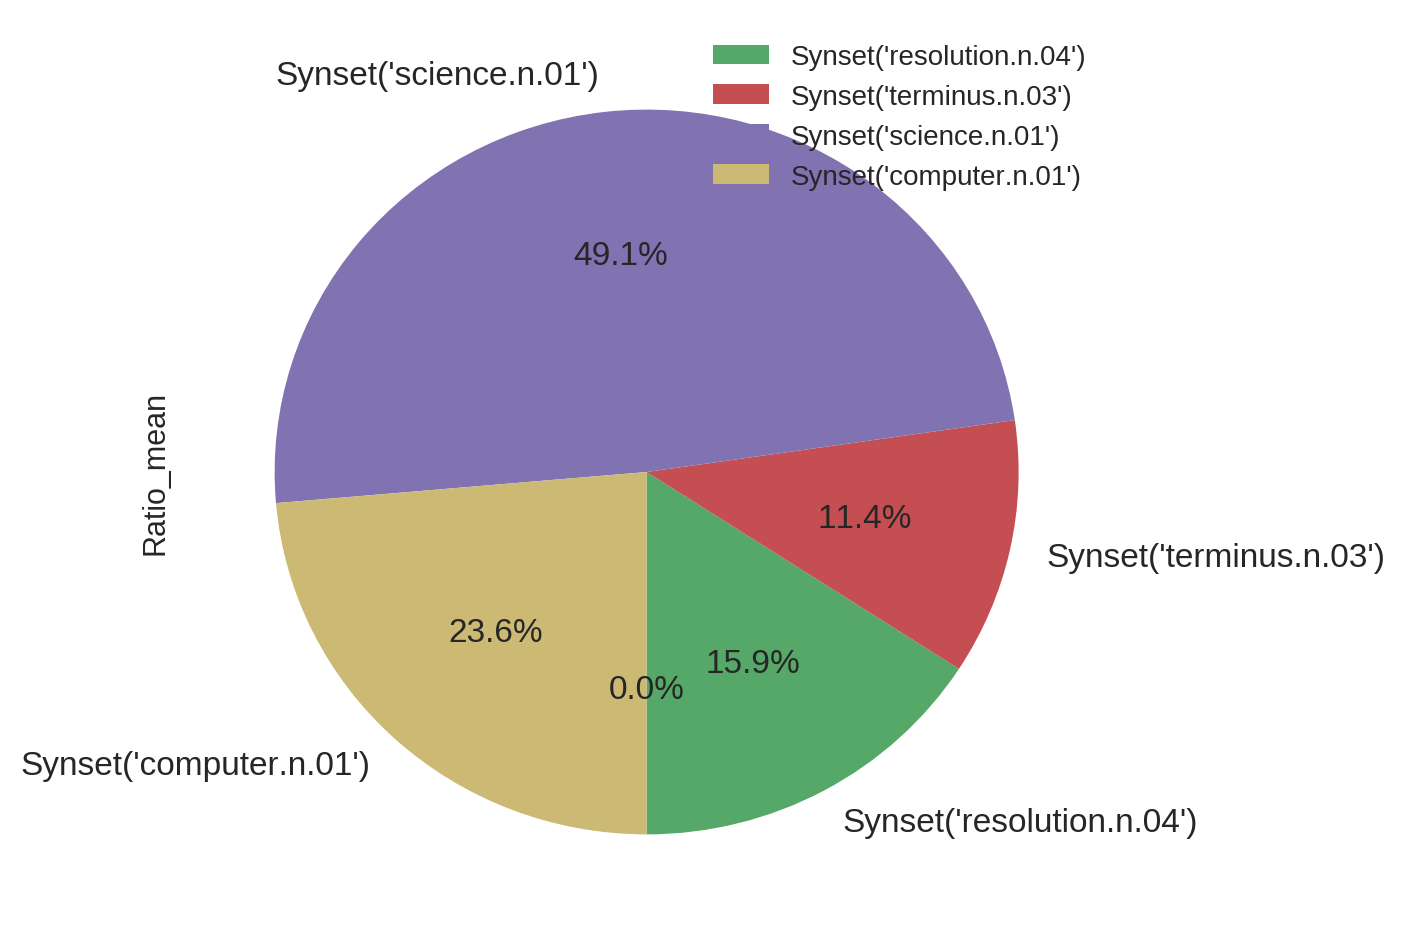

In [255]:
pragraph_pie_ratio_mean(picc)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd94feb8>], dtype=object)

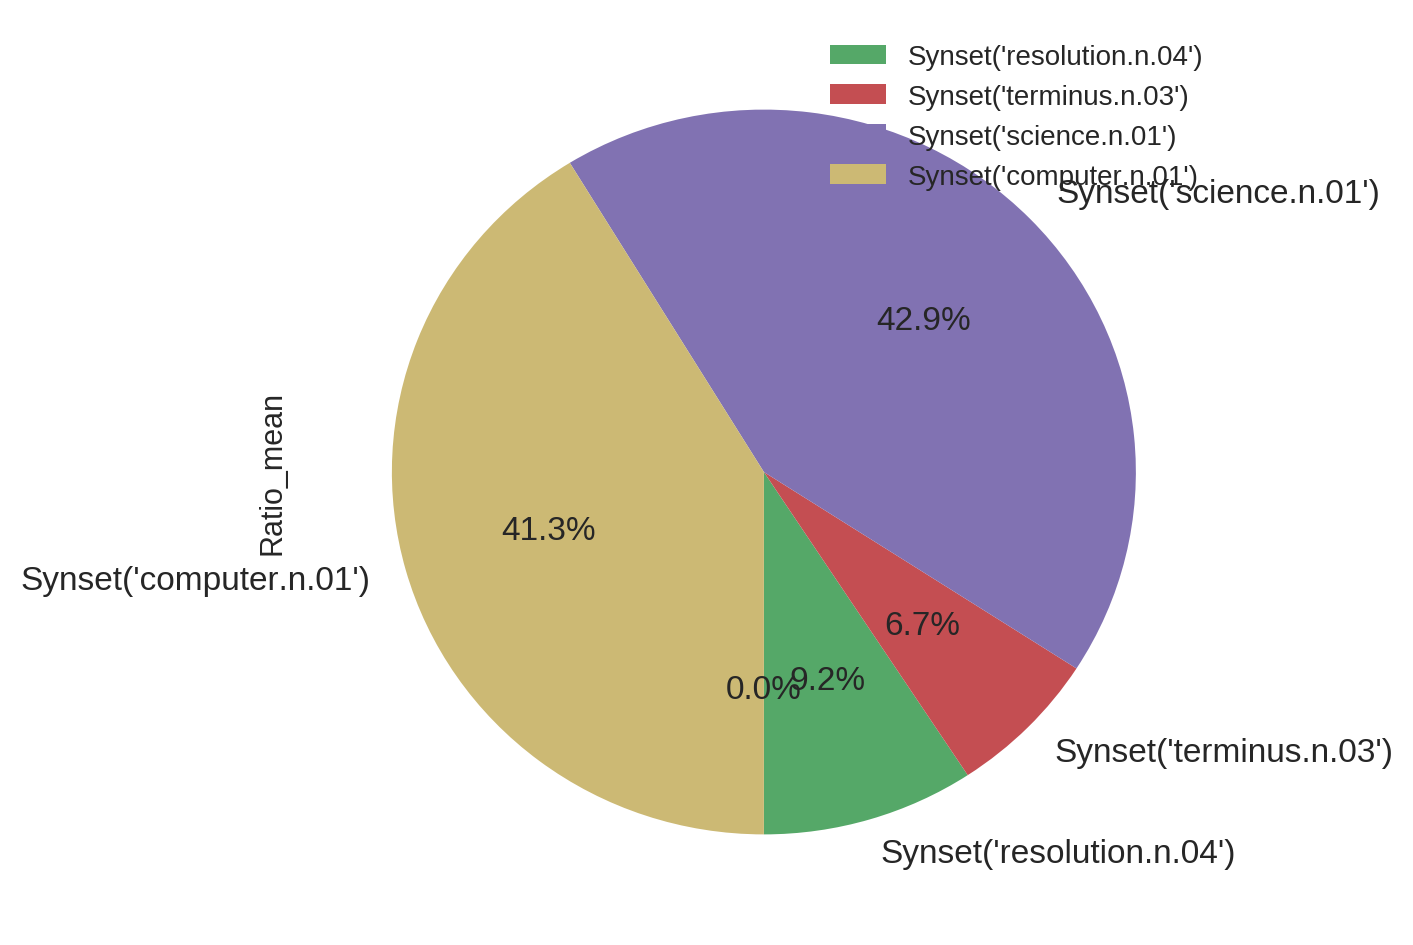

In [256]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_pic)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd5865c0>], dtype=object)

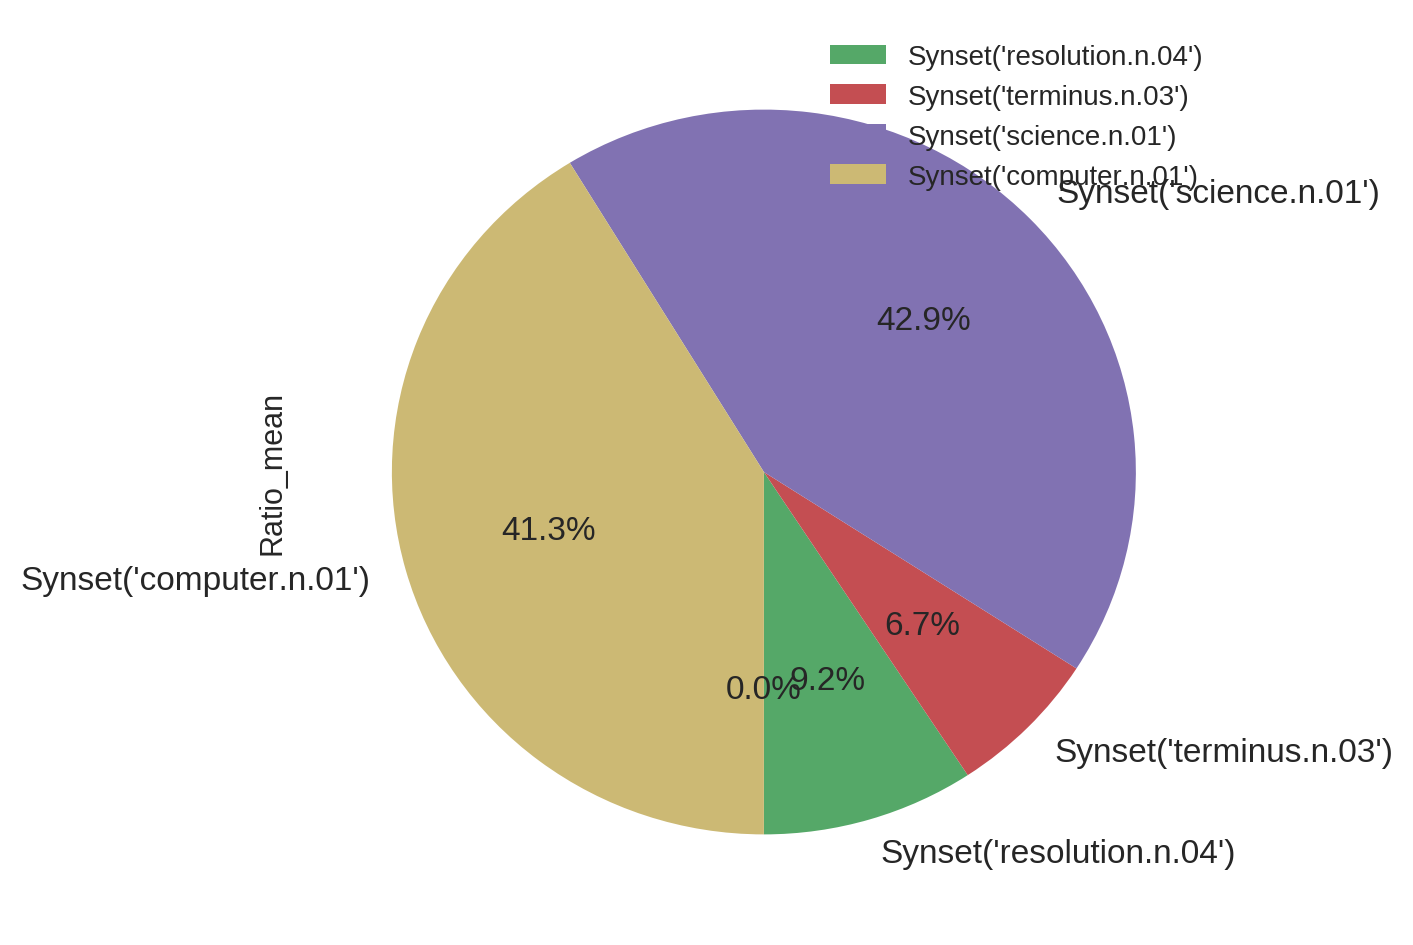

In [257]:
pragraph_pie_ratio_mean(pragraph_freq_mean_pic)

In [258]:
def pragraph_concat_bar_ratio_mean(mjcn_df,picc,mres_df):
    df=pd.concat([mjcn_df.T[['Ratio_mean']].T,picc.T[['Ratio_mean']].T, mres_df.T[['Ratio_mean']].T])
    df.index=['JCN','RES','PICC']
    #df
    #df=pragraph_df.T[['Ratio_mean']]
    ax = df.T.plot(kind='bar', title ="Key Word Ratio", figsize=(10, 10), legend=True, fontsize=12)
    ax.set_xlabel("Key Words", fontsize=12)
    #ax.set_ylabel("Ratio_mean", fontsize=12)
    plt.show()

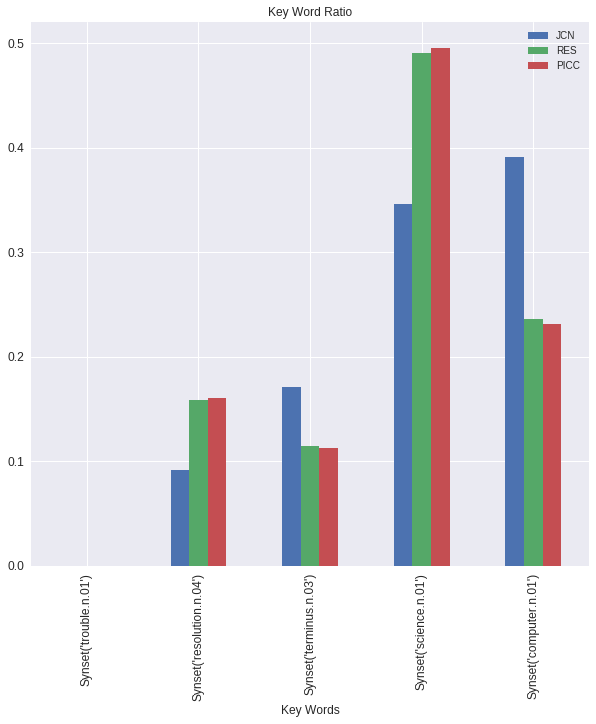

In [259]:
'''
After multible frequancy ratio in mean per column
'''
pragraph_concat_bar_ratio_mean(mjcn_df,picc,mres_df)

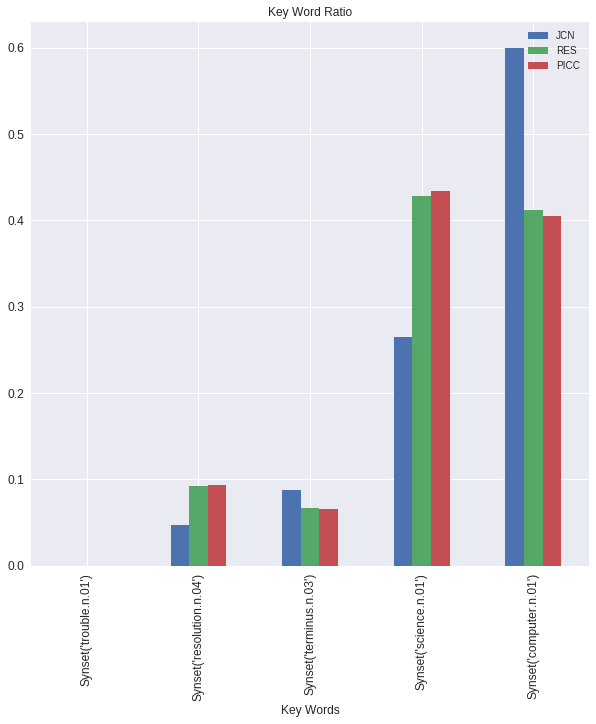

In [260]:
'''
After multible frequancy ratio in each element dataframe
'''
pragraph_concat_bar_ratio_mean(pragraph_ratio_mean_jcn,pragraph_ratio_mean_pic,pragraph_ratio_mean_res)

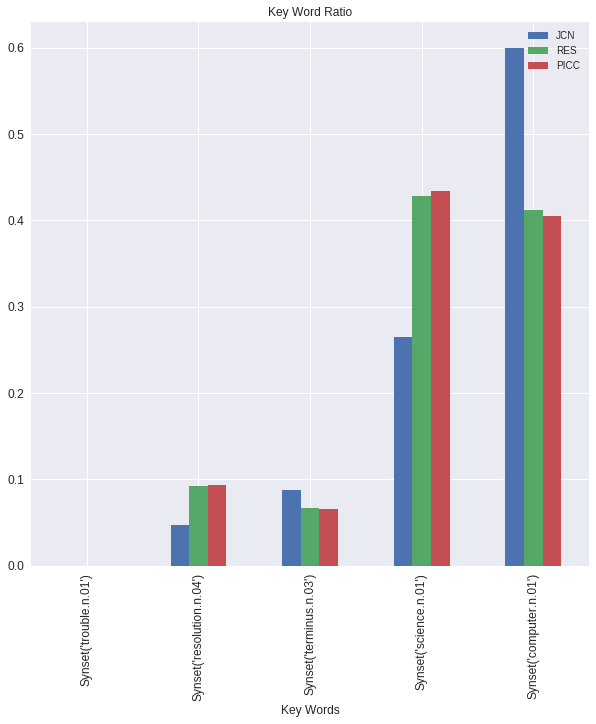

In [261]:
'''
After multible frequancy freq. in each element dataframe
'''
pragraph_concat_bar_ratio_mean(pragraph_freq_mean_jcn,pragraph_freq_mean_pic,pragraph_freq_mean_res)